In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('train.csv')
dft = pd.read_csv('test.csv')
uid = dft.User_ID
pid = dft.Product_ID

# Pre-processing

In [0]:
df=df.drop('User_ID',axis =1 )
df=df.drop('Product_ID',axis =1 )

In [4]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [34]:
print(df['Age'].unique())
print(df['Gender'].unique())
print(df['City_Category'].unique())
print(df['Stay_In_Current_City_Years'].unique())
print(df['Marital_Status'].unique())
print(df['Occupation'].unique())
print(df['Product_Category_1'].unique())
print(df['Product_Category_2'].unique())

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
['F' 'M']
['A' 'C' 'B']
['2' '4+' '3' '1' '0']
[0 1]
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


In [0]:
numeric_variables = list(df.select_dtypes(include=['int64','float']).columns.values)
df[numeric_variables]=df[numeric_variables].apply(lambda x: x.fillna(x.median()),axis=0)

In [25]:
print(df['Marital_Status'].unique())
print(df['Occupation'].unique())
print(df['Product_Category_1'].unique())
print(df['Product_Category_2'].unique())
print(df['Product_Category_3'].unique())

[0 1]
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[ 9.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12. 10. 17. 13.  7. 18.]
[14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [59]:
categorical_variables = list(df.select_dtypes(exclude=['int64','float','bool']).columns.values)
categorical_variables

['Gender']

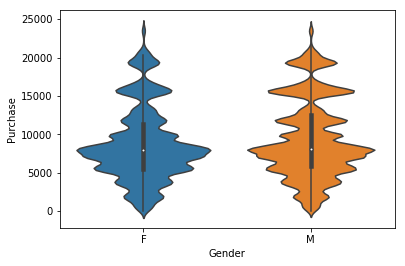

In [36]:
import seaborn as sns
sns.violinplot(x='Gender', y='Purchase', data=df)

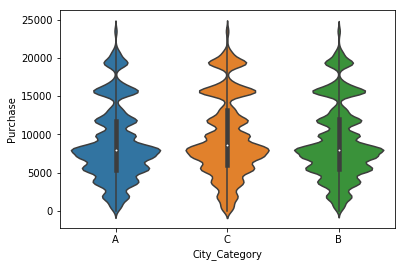

In [37]:
import seaborn as sns
sns.violinplot(x='City_Category', y='Purchase', data=df)

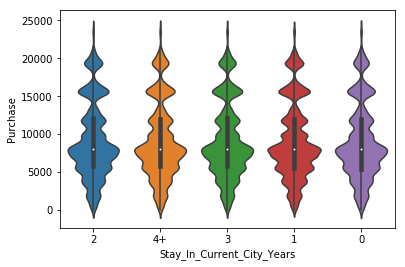

In [38]:
import seaborn as sns
sns.violinplot(x='Stay_In_Current_City_Years', y='Purchase', data=df)

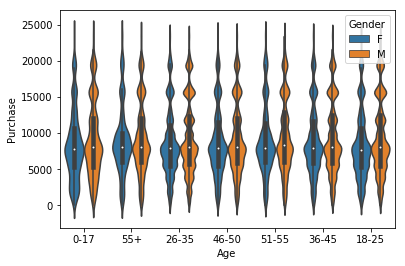

In [40]:
import seaborn as sns
sns.violinplot(x='Age', y='Purchase', hue='Gender',data=df)

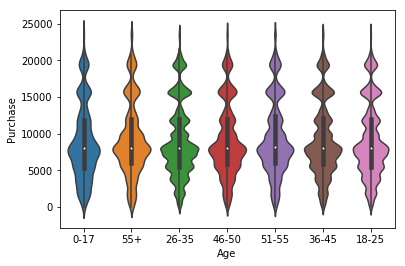

In [41]:
import seaborn as sns
sns.violinplot(x='Age', y='Purchase',data=df)

### *The above distribution suggest us that generally the purchase pattern of all the groups have similar median and variance thus on those grounds we cannot prioritize any of them*

## Strip plot
### **Strip plot is a data analysis technique used to plot the sorted values of a variable along one axis. It is used to represent the distribution of a continuous variable with respect to the different levels of a categorical variable.**

*The denser part will represent maximum frequency*

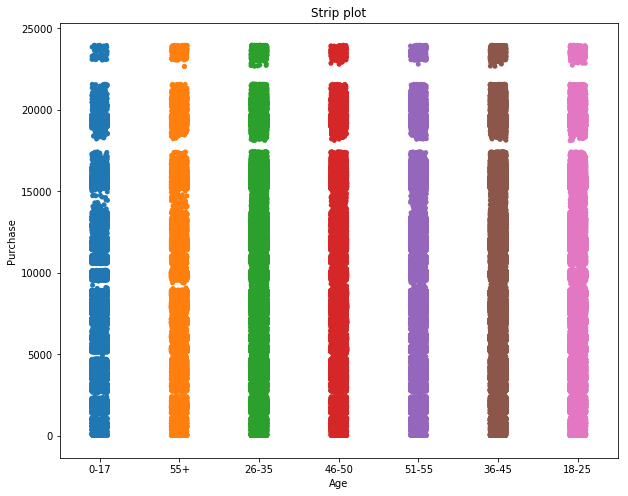

In [45]:
import seaborn as sns
fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(df['Age'], df['Purchase'], jitter=True, ax=ax)  
ax.set_title('Strip plot')  
plt.show()  

*On very specific understanding purchase is high among 26 - 35 , 45-50,36-45 , 18-25*

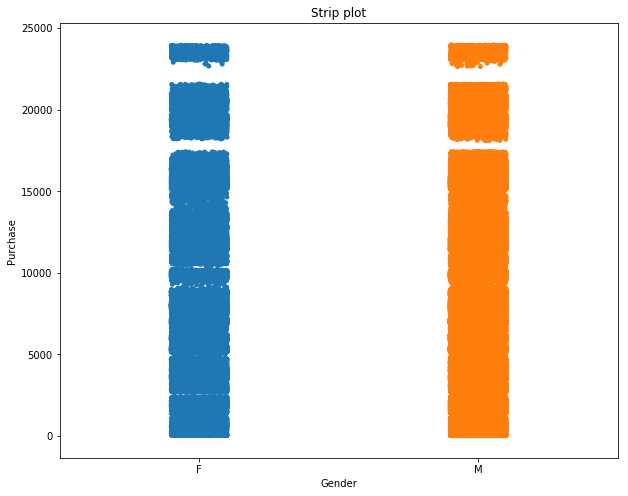

In [46]:
import seaborn as sns
fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(df['Gender'], df['Purchase'], jitter=True, ax=ax)  
ax.set_title('Strip plot')  
plt.show()  

*High frequency among Males*

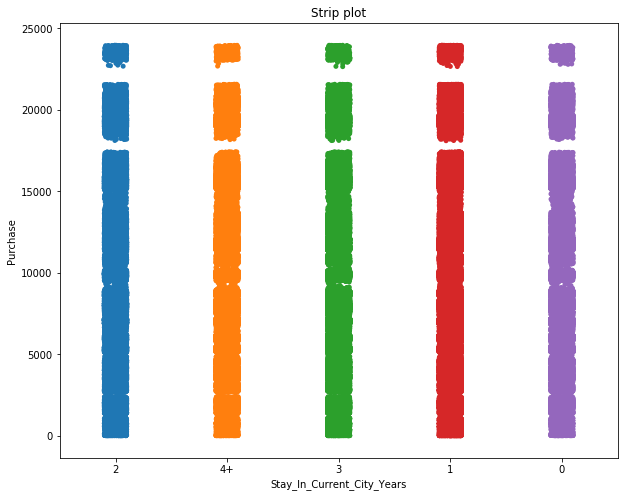

In [50]:
import seaborn as sns
fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(df['Stay_In_Current_City_Years'], df['Purchase'], jitter=True, ax=ax)  
ax.set_title('Strip plot')  
plt.show()  

*High frequency for 0 and 1 years of stay

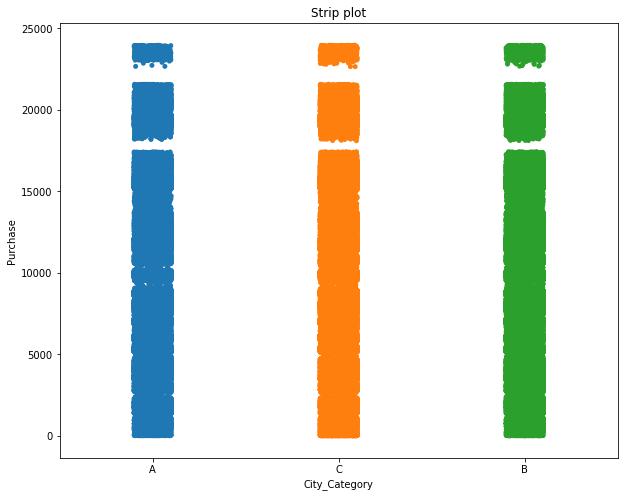

In [51]:
import seaborn as sns
fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(df['City_Category'], df['Purchase'], jitter=True, ax=ax)  
ax.set_title('Strip plot')  
plt.show()  

*High frequency B > C > A*

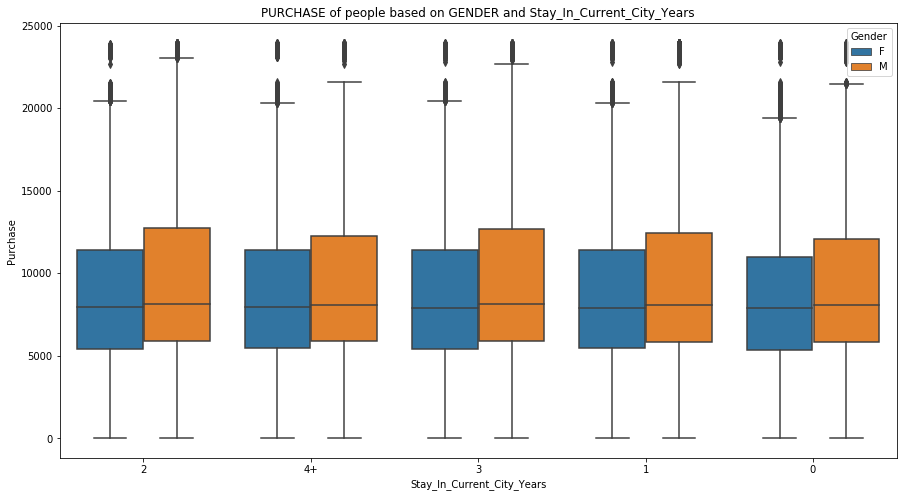

In [55]:
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='Stay_In_Current_City_Years', y='Purchase', hue='Gender', data=df, ax=ax)  
ax.set_title('PURCHASE of people based on GENDER and Stay_In_Current_City_Years')  
plt.show()  

All the male and female distributions purchase is pretty similar in terms of stay in thier respective cities

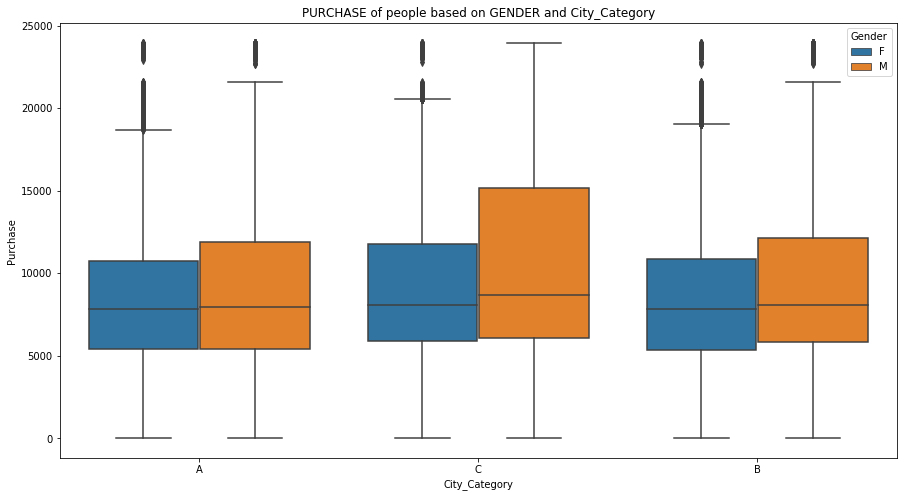

In [56]:
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='City_Category', y='Purchase', hue='Gender', data=df, ax=ax)  
ax.set_title('PURCHASE of people based on GENDER and City_Category')  
plt.show()  
 

THE MALES AND FEMALES have a pretty valid and reasonable median equalto each other in cities A and B , whereas C has difference in median

In [0]:
df['City_Category']=df['City_Category'].map({'A':1,'B':3,'C':2})
df['Age']=df['Age'].map({'0-17':1, '55+':0, '26-35':2, '46-50':1 , '51-55':1 , '36-45':2 , '18-25':2})
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].map({'2':2, '4+':1, '3':1, '1':3 ,'0':3})

In [60]:
categorical_variables

['Gender']

In [0]:
def preprocess(df):
  numeric_variables = list(df.select_dtypes(include=['int64','float']).columns.values)
  df[numeric_variables]=df[numeric_variables].apply(lambda x: x.fillna(x.mean()),axis=0)
  categorical_variables = list(df.select_dtypes(exclude=['int64','float','bool']).columns.values)
  df[categorical_variables]=df[categorical_variables].apply(lambda x: x.fillna(x.mode()),axis=0)
  df = pd.get_dummies(df, prefix_sep="__",columns=categorical_variables)  
  return df

In [0]:
df = pd.get_dummies(df, prefix_sep="__",columns=categorical_variables)  

In [64]:
df.head()

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender__F,Gender__M
0,1,10,1,2,0,3,9.0,14.0,8370,1,0
1,1,10,1,2,0,1,6.0,14.0,15200,1,0
2,1,10,1,2,0,12,9.0,14.0,1422,1,0
3,1,10,1,2,0,12,14.0,14.0,1057,1,0
4,0,16,2,1,0,8,9.0,14.0,7969,0,1


In [0]:
y = df.Purchase
X=df.drop('Purchase',axis=1)

# ML

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [67]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
rms

4705.986108809145

# Test

In [0]:
def prep(df):
  df=df.drop('User_ID',axis =1 )
  df=df.drop('Product_ID',axis =1 )
  numeric_variables = list(df.select_dtypes(include=['int64','float']).columns.values)
  df[numeric_variables]=df[numeric_variables].apply(lambda x: x.fillna(x.median()),axis=0)
  df['City_Category']=df['City_Category'].map({'A':1,'B':3,'C':2})
  df['Age']=df['Age'].map({'0-17':1, '55+':0, '26-35':2, '46-50':1 , '51-55':1 , '36-45':2 , '18-25':2})
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].map({'2':2, '4+':1, '3':1, '1':3 ,'0':3})
  df = pd.get_dummies(df, prefix_sep="__",columns=categorical_variables)  
  return df

In [0]:
dfy = prep(dft)

In [77]:
dfy.shape

(233599, 10)

In [78]:
X.shape

(550068, 10)

In [80]:
y_pred = reg.predict(dfy)
sam = pd.read_csv('Sample.csv')
sam['Purchase']=y_pred
sam['User_ID']=uid
sam['Product_ID']=pid
sam.to_csv('soln.csv',index=False)
sam.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,11321.160635
1,1000009,P00113442,10617.893379
2,1000010,P00288442,8758.729111
3,1000010,P00145342,9427.828861
4,1000011,P00053842,9605.737793
